In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import geopandas as gpd
import morefish as mf

Give a name to your segmentation results.

Here I use `"seg_name='test'"`

In [2]:
seg_name='test'

In [3]:
mr_dirn = '/gale/netapp/home/wtian/bican/incoming/output/'\
            '202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0'

`morefish.MerfishRegion` is the entry point of MERSCOPE result analysis.

It will read the output folder from the MERSCOPE machine.

A "MOREFISH" folder will be created in the `mr_dirn`, and metadata will be prepared for MoreFish analysis.

In [4]:
mr = mf.MerfishRegion(mr_dirn)

2024-02-08 14:33:12.864 | INFO     | morefish.merfish:_prepare_dir:272 - Preparing directories
2024-02-08 14:33:12.867 | INFO     | morefish.merfish:_read_manifest:283 - Reading MERSCOPE manifest
2024-02-08 14:33:12.874 | INFO     | morefish.merfish:_prepare_tiles:298 - Tile file tiles.json loaded
2024-02-08 14:33:12.875 | INFO     | morefish.merfish:__init__:244 - Preparing unit transformer
2024-02-08 14:33:12.878 | INFO     | morefish.merfish:__init__:247 - Preparing transcripts
2024-02-08 14:33:12.878 | INFO     | morefish.merfish:__init__:131 - Loading transcript coord file: transcripts.npz


For each merfish region, you may have different segmentation results.

We could list the segmentation results of current merfish region.

The "native" is the result generated from MERSCOPE machine, and the "test" one is what generated ahead of the time

In [12]:
mr.list_seg_results()

['native', 'test']

Load the segmantation result of "test"

In [13]:
mr.load_segmentation_results(seg_name)

2024-02-08 14:44:40.017 | INFO     | morefish.merfish:load_segmentation_results:497 - Loading segmentation results for "test"


The merscope image results are organized by "tiles".

All image analysis (eg. resegmentation) and visualization are performed on tiles.

Here we plot the DAPI stain and the transcript detected of a tile

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
mf.pl.imgplot(mr, 'DAPI', 3, 717, ax=axes[0])
mf.pl.transcriptplot(mr, 717, c='r',s=0.1, marker='.', ax=axes[1])

<Axes: >

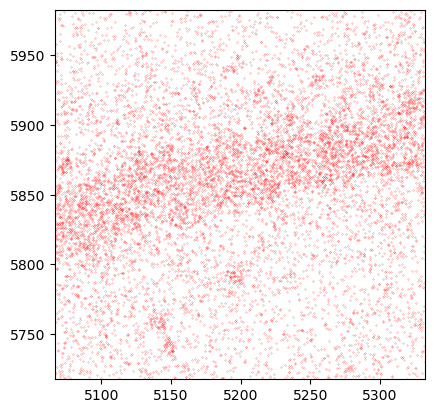

In [5]:
pretained_cp_model_path = '/gale/netapp/home/wtian/bican/projects/morefisher/entry/0112from0'
segor = mf.seg.Segmentor(mr, seg_name, model_kws=dict(pretrained_path=pretained_cp_model_path))

In [4]:
segs = segor.segment_all_tiles(mr, ['DAPI','PolyT',None], 3, seg_name, )

2024-02-05 16:47:42.850 | INFO     | morefish.seg.seg:segment_all_tiles:77 - Segmenting each tile for task "test". Skipping existing segmentations.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1551/1551 [1:53:29<00:00,  4.39s/it]
2024-02-05 18:41:12.211 | INFO     | morefish.seg.seg:segment_all_tiles:100 - Tile segmentation completed


In [5]:
cell_segs = segor.compile_segs(segs)
mr._save_boundaries(cell_segs,seg_name)

/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9

In [6]:
segs = segor.segment_all_tiles(['DAPI','PolyT',None], 3,  )
cell_segs = segor.compile_segs(segs)

2024-02-08 11:58:01.038 | INFO     | morefish.seg.seg:segment_all_tiles:84 - Segmenting each tile for task "test". Skipping existing segmentations.
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1551/1551 [00:06<00:00, 244.59it/s]
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)
/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encoun

In [7]:
cxg = segor.partition_transcripts(cell_segs, )

2024-02-08 11:59:26.055 | INFO     | morefish.seg.seg:partition_transcripts:248 - Skipping existing partitions
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1243/1243 [00:04<00:00, 309.44it/s]


In [8]:
mr.save_reseg_results(cell_segs, cxg, seg_name)

2024-02-08 12:00:08.792 | WARNING  | morefish.merfish:_save_boundaries:406 - /gale/netapp/home/wtian/bican/incoming/output/202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/MOREFISH/ReSeg/test/cell_boundaries.parquet already exists. Use "override=True" if you want to update it
2024-02-08 12:00:08.793 | WARNING  | morefish.merfish:_save_meta:430 - /gale/netapp/home/wtian/bican/incoming/output/202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/MOREFISH/ReSeg/test/cell_metadata.csv already exists. Use "override=True" if you want to update it
2024-02-08 12:00:08.794 | WARNING  | morefish.merfish:_save_cellbygene:451 - /gale/netapp/home/wtian/bican/incoming/output/202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/MOREFISH/ReSeg/test/cell_by_gene.csv already exists. Use "override=True" if you want to update it


In [5]:
mr.load_segmentation_results(seg_name)

2024-02-08 14:02:06.619 | INFO     | morefish.merfish:load_segmentation_results:497 - Loading segmentation results for "test"


In [17]:
tile_i = 717

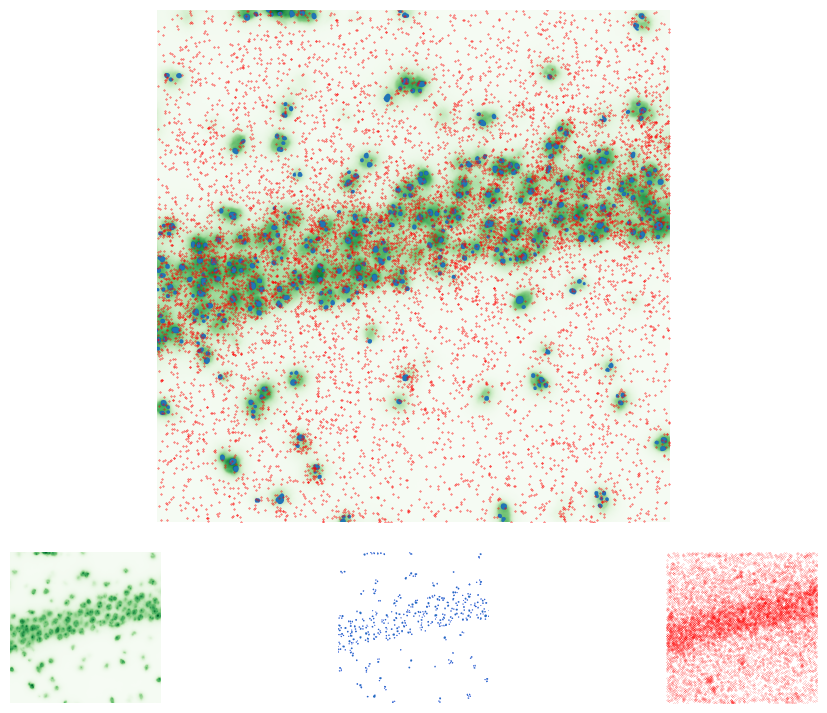

In [18]:
fig = plt.figure(figsize=(12, 9))  # Set the figure size
gs = GridSpec(4, 3, figure=fig)

axes = [plt.subplot(gs[0:3, :]),
        plt.subplot(gs[3, 0]),
        plt.subplot(gs[3, 1]),
        plt.subplot(gs[3, 2]),]

ax = axes[0]
mf.pl.imgplot(mr, 'DAPI', 3, tile_i, ax=ax,
              cmap='Greens')
mf.pl.boundaryplot(mr, tile_i, ax=ax,
                   facecolor=None, edgecolor='b', linewidth=0.1)
mf.pl.transcriptplot(mr, tile_i, ax=ax,
                     c='r',s=0.1)


ax = axes[1]
mf.pl.imgplot(mr, 'DAPI', 3, tile_i, ax=ax,
              cmap='Greens')

ax = axes[2]
mf.pl.boundaryplot(mr, tile_i, ax=ax,
                   facecolor=None, edgecolor='b', linewidth=0.1)

ax = axes[3]
mf.pl.transcriptplot(mr, tile_i, ax=ax,
                     c='r',s=0.01)

for ax in axes:
    ax.axis('off')

# plt.tight_layout(w_pad=0.05)
plt.show()


<Axes: >

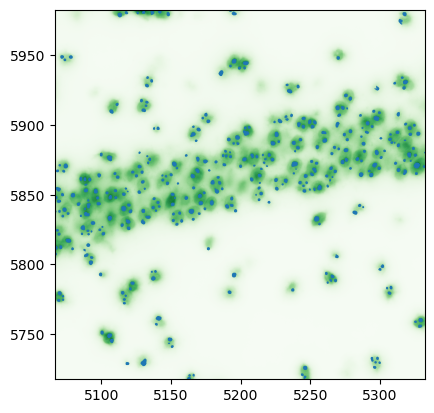

In [14]:
mf.pl.imgplot(mr, 'DAPI', 3, 717, 
              cmap='Greens')
mf.pl.boundaryplot(mr,717, facecolor=None, linewidth=0.1)

<Axes: >

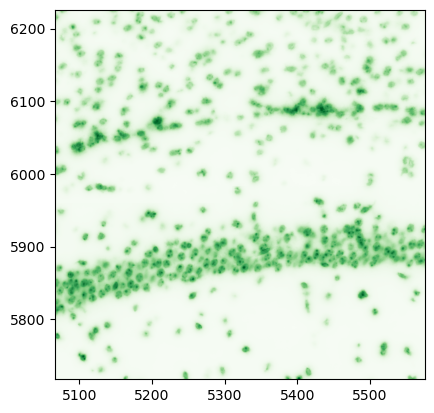

In [7]:
mf.pl.imgplot(mr, 'DAPI', 3, [717,718,751,750],
              cmap='Greens')


<Axes: >

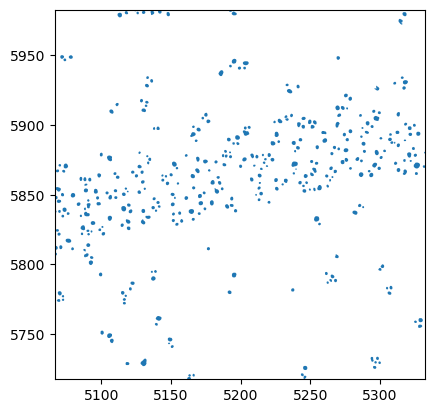

In [8]:
mf.pl.boundaryplot(mr,717)

<Axes: >

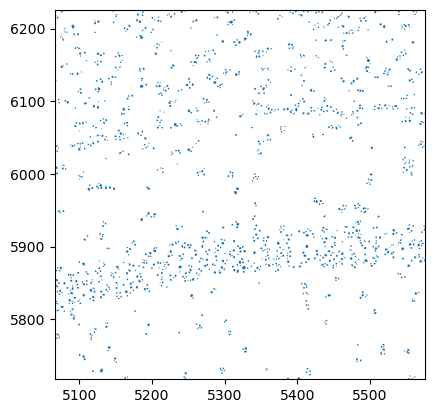

In [9]:
mf.pl.boundaryplot(mr,[717,718,751,750])

<Axes: >

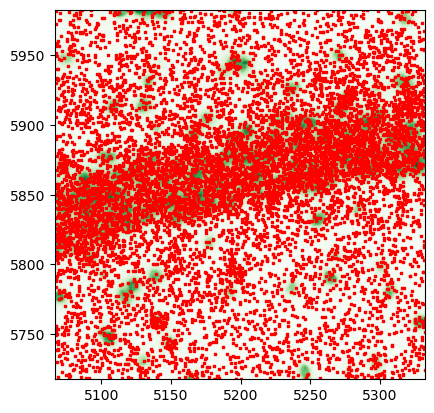

In [24]:
mf.pl.imgplot(mr, 'DAPI', 3, 717, 
              cmap='Greens')
mf.pl.transcriptplot(mr,717, s=0.8, c='r', marker=',')
# mf.pl.boundaryplot(mr,717)

<Axes: >

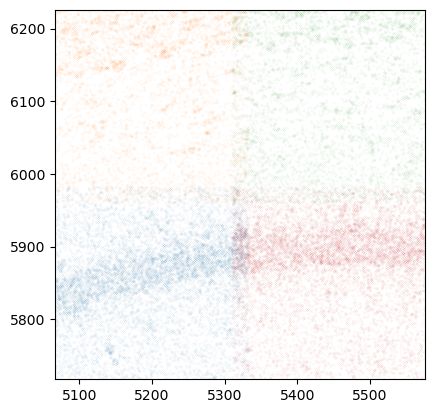

In [13]:
mf.pl.transcriptplot(mr,[717,718,751,750],s=0.001)

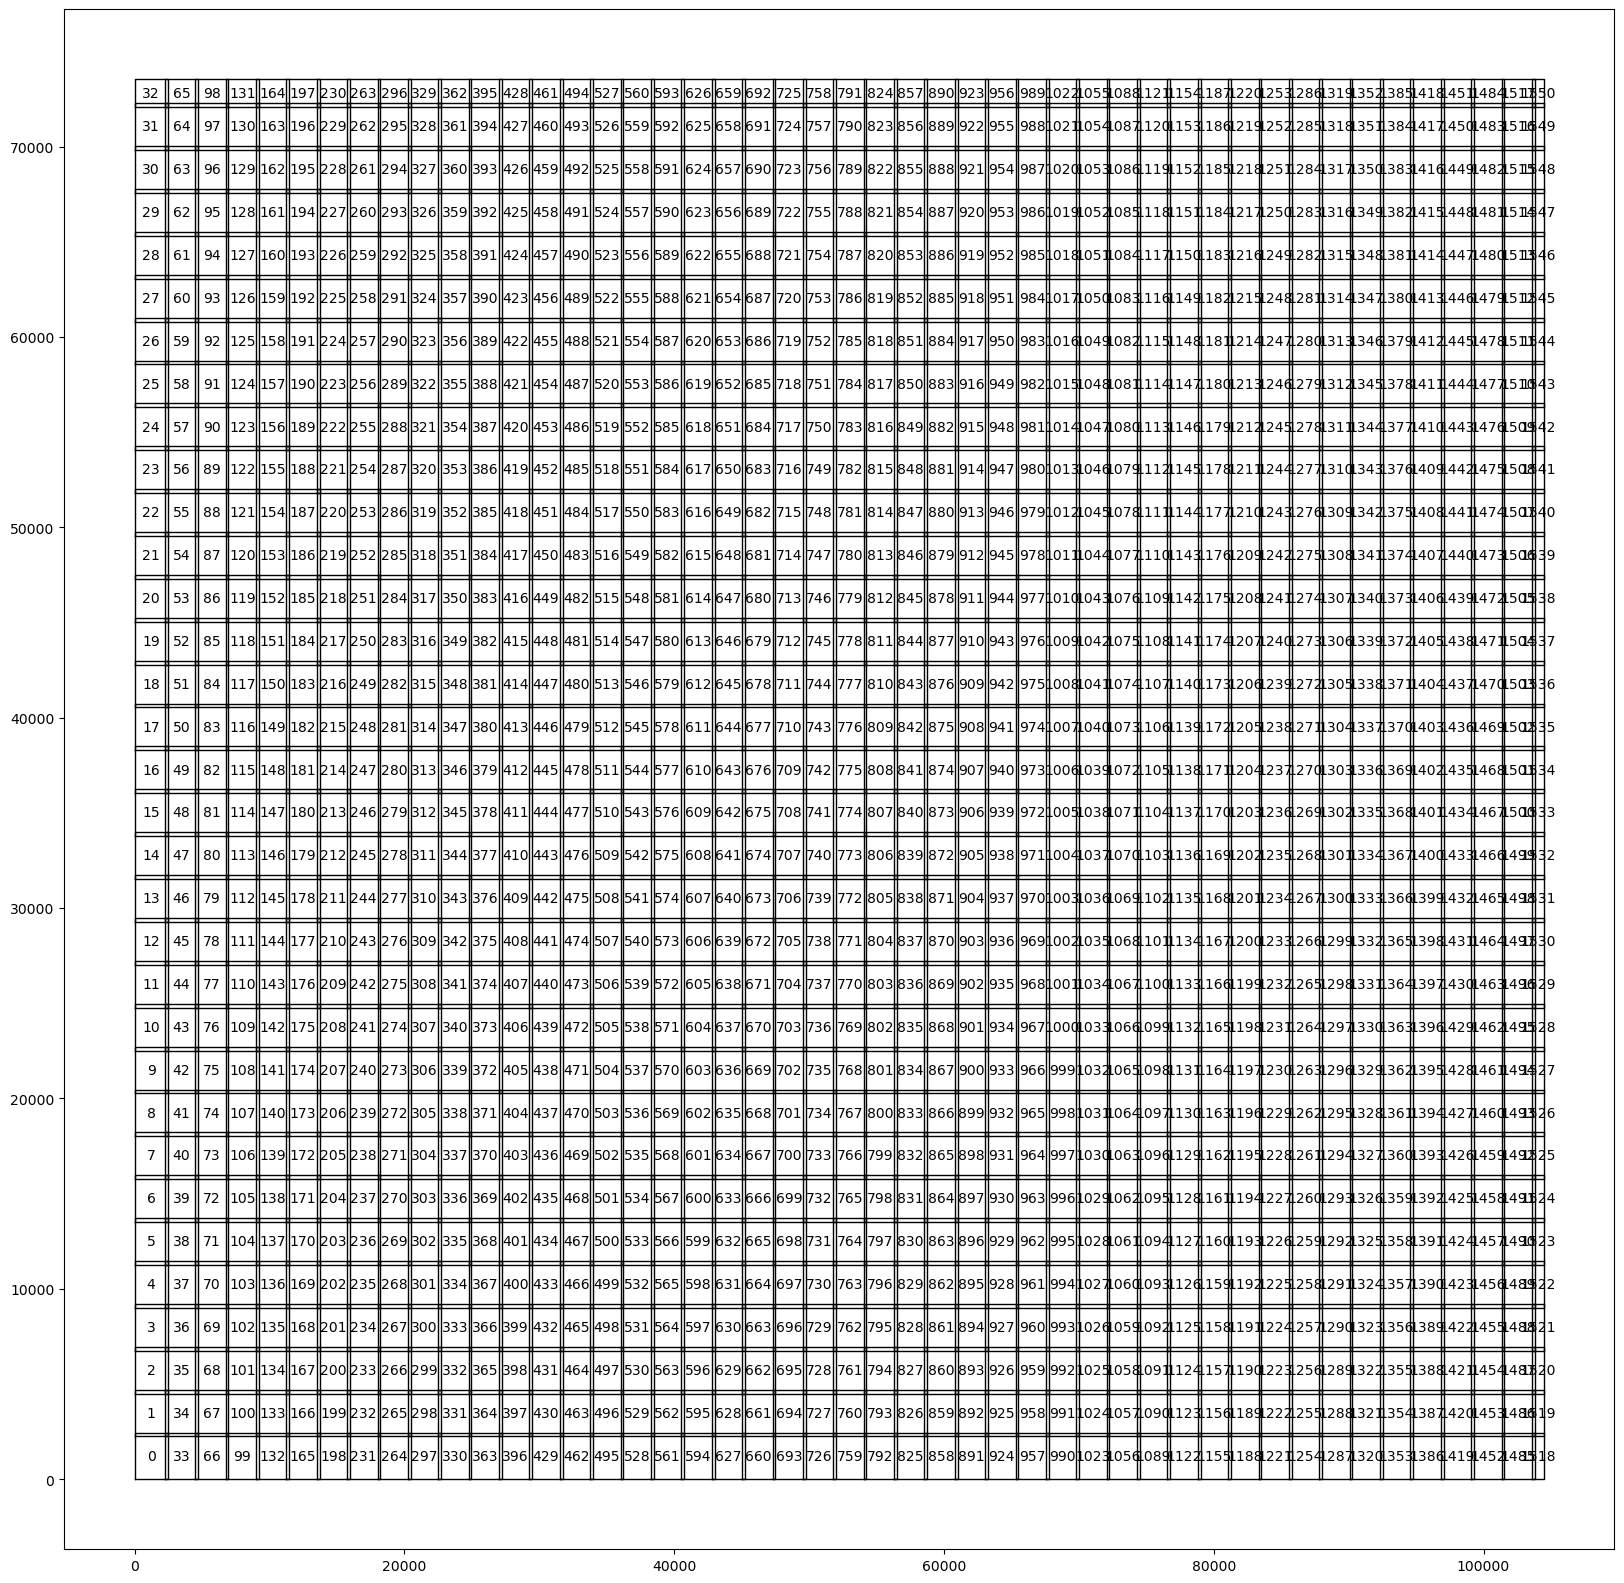

In [33]:
ax = None
# def tileplot(mr, ax=None):
    ## this works with imshow
if True:
    if ax is None:
        fig, ax = plt.subplots(figsize=(20,20))
    for i, (x, y, w, h) in enumerate(mr.tiles.tiles):
        color = (1,1,1)  # white
        alpha = 0.1
#         rectangle = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='k', facecolor=color + (alpha,))
        ax.plot([x,x+w,x+w,x,x],[y,y,y+h,y+h,y], linewidth=1, c='k')
#         ax.add_patch(rectangle)
        ax.text(x+w/2, y+h/2, str(i), ha='center', va='center',)
 


In [12]:
mr.adata

AnnData object with n_obs × n_vars = 352262 × 500
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'DAPI_raw', 'DAPI_high_pass', 'PolyT_raw', 'PolyT_high_pass'
    uns: 'neg_probs'

In [19]:
mr.boundaries

Geometry
cell                                                             
00002103000031  POLYGON ((201.815 5056.586, 201.599 5056.802, ...
00002103000032  POLYGON ((199.979 5059.394, 199.547 5059.610, ...
00002103000034  POLYGON ((201.059 5062.958, 200.951 5063.066, ...
00002103000038  POLYGON ((199.439 5066.630, 198.683 5067.170, ...
00002103000041  POLYGON ((200.735 5069.546, 200.519 5069.762, ...
...                                                           ...
00119903000012  POLYGON ((8970.918 2562.241, 8970.810 2562.349...
00123103000442  POLYGON ((8968.218 2567.317, 8968.110 2567.533...
00119903000038  MULTIPOLYGON (((8959.470 2572.177, 8959.578 25...
00116603000391  POLYGON ((8716.903 2799.407, 8717.011 2799.947...
00119903000511  POLYGON ((8736.991 2816.147, 8737.423 2815.823...

[352262 rows x 1 columns]

In [11]:
cxg

gene            1500012K07Rik  1700061G19Rik  1700066N21Rik  2010001A14Rik  \
cell                                                                         
00002103000031              0              0              0              0   
00002103000032              0              0              0              0   
00002103000034              0              0              0              0   
00002103000038              0              0              0              0   
00002103000041              0              0              0              0   
...                       ...            ...            ...            ...   
00119903000012              0              0              0              0   
00123103000442              0              0              0              0   
00119903000038              0              0              0              0   
00116603000391              0              0              0              0   
00119903000511              0              0              0              0   

gene            2210408F21Rik  2610301B20Rik  3110039M20Rik  4930402D18Rik  \
cell                                                                         
00002103000031              0              0              0              0   
00002103000032              0              0              0              0   
00002103000034              0              0              0              0   
00002103000038              0              0              0              0   
00002103000041              0              0              0              0   
...                       ...            ...            ...            ...   
00119903000012              0              0              0              0   
00123103000442              0              0              0              0   
00119903000038              0              0              0              0   
00116603000391              0              0              0              0   
00119903000511              0              0              0              0   

gene            4930435C17Rik  4930488L21Rik  ...  Vmn1r74  Vsnl1  Vsx2  Whrn  \
cell                                          ...                               
00002103000031              0              0  ...        0      0     0     0   
00002103000032              0              0  ...        0      0     0     0   
00002103000034              0              0  ...        0      0     0     0   
00002103000038              0              0  ...        0      0     0     0   
00002103000041              0              0  ...        0      0     0     0   
...                       ...            ...  ...      ...    ...   ...   ...   
00119903000012              0              0  ...        0      0     0     0   
00123103000442              0              0  ...        0      1     0     0   
00119903000038              0              0  ...        0      0     0     0   
00116603000391              0              0  ...        0      0     0     0   
00119903000511              0              0  ...        0      0     0     0   

gene            Wrb  Wscd2  Ythdf2  Zeb2  Zfp560  Zic1  
cell                                                    
00002103000031    0      0       0     0       0     0  
00002103000032    0      0       0     0       0     0  
00002103000034    0      0       0     0       0     0  
00002103000038    0      0       0     0       0     0  
00002103000041    0      0       0     0       0     0  
...             ...    ...     ...   ...     ...   ...  
00119903000012    0      0       0     0       0     0  
00123103000442    0      0       0     0       0     0  
00119903000038    0      0       0     0       0     0  
00116603000391    0      0       0     0       0     0  
00119903000511    0      0       0     0       0     0  

[352262 rows x 550 columns]

In [7]:
# parti = mf.seg.partition_transcripts(cell_segs[cell_segs.columns[cell_segs.dtypes=='geometry']], mr)

cxg = mf.seg.get_cell_x_gene_matrix(cell_segs[cell_segs.columns[cell_segs.dtypes=='geometry']], mr)

2024-02-07 14:06:23.755 | INFO     | morefish.seg.seg:partition_transcripts:369 - Partitioning transcripts into cells
100%|██████████████████████████████████████████████████████████████████████████████████████████| 124202403/124202403 [1:59:17<00:00, 17353.71it/s]
2024-02-07 16:05:40.877 | INFO     | morefish.seg.seg:partition_transcripts:393 - Compiling cell x gene matrix


In [20]:
df = parti

In [21]:
cxg = df[df['cell']!=-1].pivot_table(index='cell', columns='gene', 
                                        aggfunc='size', fill_value=0)

cxg.index = cell_segs.index[cxg.index]

cxg = cxg.reindex(cell_segs.index).fillna(0).astype(int)

In [8]:
mr._save_cellbygene(cxg, seg_name)

In [7]:
cxg = pd.read_csv(f'{mr_dirn}/MOREFISH/ReSeg/{seg_name}/cell_by_gene.csv', index_col=0)

In [38]:
mr.save_reseg_results(cell_segs, cxg, seg_name, override=True)

In [85]:
from loguru import logger
import anndata
def _negcols(cxg):
    return cxg.columns[cxg.columns.str.startswith('Blank-')]

def load_reseg_results(_mr, name=None):
    if name is None:
        name = 'native'
    if not _mr.check_seg_results(name):
        raise ValueError(f'{name} does not refer to a valid segmentation result')
    cxg_fn, cmeta_fn, cb_fn = _mr._seg_name_to_path(name)

    cxg = pd.read_csv(cxg_fn, index_col=0, dtype={'cell': str,'EntityID': str})
    cmeta = pd.read_csv(cmeta_fn, index_col=0, dtype={'cell': str,'EntityID': str})
    cb = gpd.read_parquet(cb_fn)
    cb.index = cb['EntityID']
    cb = cb.reindex(cxg.index)
    return cxg, cmeta, cb
    
    negcxg = cxg.loc[:,cxg.columns.isin(_negcols(cxg))]
    cxg = cxg.loc[:,~cxg.columns.isin(_negcols(cxg))]
    
    adata = anndata.AnnData(cxg, obs=cmeta.reindex(cxg.index), dtype=int)
    adata.uns['neg_probs'] = negcxg
    adata.uns['cell_boundary'] = cb[['Geometry']]
#     adata.uns['merfish_region'] = _mr
    return adata#, cxg, cmeta, cb

In [86]:
cxg_, cmeta, cb  = load_reseg_results(mr, seg_name)
# ad= load_reseg_results(mr, seg_name)

In [87]:
cb

ID        EntityID ZIndex  \
cell                                            
00002103000031       0  00002103000031   None   
00002103000032       1  00002103000032   None   
00002103000034       2  00002103000034   None   
00002103000038       3  00002103000038   None   
00002103000041       4  00002103000041   None   
...                ...             ...    ...   
00119903000012  352257  00119903000012   None   
00123103000442  352258  00123103000442   None   
00119903000038  352259  00119903000038   None   
00116603000391  352260  00116603000391   None   
00119903000511  352261  00119903000511   None   

                                                         Geometry  Type  \
cell                                                                      
00002103000031  POLYGON ((201.815 5056.586, 201.599 5056.802, ...  cell   
00002103000032  POLYGON ((199.979 5059.394, 199.547 5059.610, ...  cell   
00002103000034  POLYGON ((201.059 5062.958, 200.951 5063.066, ...  cell   
00002103000038  POLYGON ((199.439 5066.630, 198.683 5067.170, ...  cell   
00002103000041  POLYGON ((200.735 5069.546, 200.519 5069.762, ...  cell   
...                                                           ...   ...   
00119903000012  POLYGON ((8970.918 2562.241, 8970.810 2562.349...  cell   
00123103000442  POLYGON ((8968.218 2567.317, 8968.110 2567.533...  cell   
00119903000038  MULTIPOLYGON (((8959.470 2572.177, 8959.578 25...  cell   
00116603000391  POLYGON ((8716.903 2799.407, 8717.011 2799.947...  cell   
00119903000511  POLYGON ((8736.991 2816.147, 8737.423 2815.823...  cell   

               ZLevel  Name ParentID ParentType  
cell                                             
00002103000031   None  None     None       None  
00002103000032   None  None     None       None  
00002103000034   None  None     None       None  
00002103000038   None  None     None       None  
00002103000041   None  None     None       None  
...               ...   ...      ...        ...  
00119903000012   None  None     None       None  
00123103000442   None  None     None       None  
00119903000038   None  None     None       None  
00116603000391   None  None     None       None  
00119903000511   None  None     None       None  

[352262 rows x 9 columns]

In [84]:
cb.index = cb['EntityID']

ID        EntityID ZIndex  \
0            0  00002103000031   None   
1            1  00002103000032   None   
2            2  00002103000034   None   
3            3  00002103000038   None   
4            4  00002103000041   None   
...        ...             ...    ...   
352257  352257  00119903000012   None   
352258  352258  00123103000442   None   
352259  352259  00119903000038   None   
352260  352260  00116603000391   None   
352261  352261  00119903000511   None   

                                                 Geometry  Type ZLevel  Name  \
0       POLYGON ((201.815 5056.586, 201.599 5056.802, ...  cell   None  None   
1       POLYGON ((199.979 5059.394, 199.547 5059.610, ...  cell   None  None   
2       POLYGON ((201.059 5062.958, 200.951 5063.066, ...  cell   None  None   
3       POLYGON ((199.439 5066.630, 198.683 5067.170, ...  cell   None  None   
4       POLYGON ((200.735 5069.546, 200.519 5069.762, ...  cell   None  None   
...                                                   ...   ...    ...   ...   
352257  POLYGON ((8970.918 2562.241, 8970.810 2562.349...  cell   None  None   
352258  POLYGON ((8968.218 2567.317, 8968.110 2567.533...  cell   None  None   
352259  MULTIPOLYGON (((8959.470 2572.177, 8959.578 25...  cell   None  None   
352260  POLYGON ((8716.903 2799.407, 8717.011 2799.947...  cell   None  None   
352261  POLYGON ((8736.991 2816.147, 8737.423 2815.823...  cell   None  None   

       ParentID ParentType  
0          None       None  
1          None       None  
2          None       None  
3          None       None  
4          None       None  
...         ...        ...  
352257     None       None  
352258     None       None  
352259     None       None  
352260     None       None  
352261     None       None  

[352262 rows x 9 columns]

In [82]:
cxg.index

Index(['00002103000031', '00002103000032', '00002103000034', '00002103000038',
       '00002103000041', '00002103000043', '00002103000045', '00002103000046',
       '00002103000047', '00002103000048',
       ...
       '00120003000040', '00120003000039', '00123203000485', '00120003000042',
       '00120003000044', '00119903000012', '00123103000442', '00119903000038',
       '00116603000391', '00119903000511'],
      dtype='object', name='cell', length=352262)

In [78]:
cmeta

fov  volume     center_x     center_y        min_x  \
cell                                                                 
00002103000031  NaN     NaN   202.124270  5057.898141   200.950572   
00002103000032  NaN     NaN   200.337847  5060.483099   199.222585   
00002103000034  NaN     NaN   201.120580  5064.089185   200.086578   
00002103000038  NaN     NaN   199.490680  5067.475427   198.682589   
00002103000041  NaN     NaN   201.012863  5070.294799   200.194578   
...             ...     ...          ...          ...          ...   
00119903000012  NaN     NaN  8971.837360  2562.991886  8970.701571   
00123103000442  NaN     NaN  8969.456111  2567.633224  8968.109590   
00119903000038  NaN     NaN  8959.705523  2572.147501  8958.281663   
00116603000391  NaN     NaN  8718.003752  2799.688354  8716.903452   
00119903000511  NaN     NaN  8736.563764  2815.060105  8735.587314   

                      min_y        max_x        max_y  anisotropy  \
cell                                                                
00002103000031  5056.586018   203.218555  5059.069995         NaN   
00002103000032  5059.393992   201.490568  5061.553972         NaN   
00002103000034  5062.957959   202.138563  5065.225937         NaN   
00002103000038  5066.629924   200.302577  5068.249909         NaN   
00002103000041  5069.545897   201.814566  5071.057883         NaN   
...                     ...          ...          ...         ...   
00119903000012  2561.809392  8972.969554  2564.185369         NaN   
00123103000442  2565.589356  8970.809570  2569.585319         NaN   
00119903000038  2571.097305  8961.305641  2573.149285         NaN   
00116603000391  2798.867171  8719.063436  2800.595155         NaN   
00119903000511  2813.879030  8737.639299  2816.147009         NaN   

                transcript_count  perimeter_area_ratio  solidity  DAPI_raw  \
cell                                                                         
00002103000031                 9                   NaN       NaN       NaN   
00002103000032                 5                   NaN       NaN       NaN   
00002103000034                 5                   NaN       NaN       NaN   
00002103000038                 3                   NaN       NaN       NaN   
00002103000041                 8                   NaN       NaN       NaN   
...                          ...                   ...       ...       ...   
00119903000012                 7                   NaN       NaN       NaN   
00123103000442                27                   NaN       NaN       NaN   
00119903000038                13                   NaN       NaN       NaN   
00116603000391                 4                   NaN       NaN       NaN   
00119903000511                10                   NaN       NaN       NaN   

                DAPI_high_pass  PolyT_raw  PolyT_high_pass  
cell                                                        
00002103000031             NaN        NaN              NaN  
00002103000032             NaN        NaN              NaN  
00002103000034             NaN        NaN              NaN  
00002103000038             NaN        NaN              NaN  
00002103000041             NaN        NaN              NaN  
...                        ...        ...              ...  
00119903000012             NaN        NaN              NaN  
00123103000442             NaN        NaN              NaN  
00119903000038             NaN        NaN              NaN  
00116603000391             NaN        NaN              NaN  
00119903000511             NaN        NaN              NaN  

[352262 rows x 16 columns]

In [73]:
ad.uns['cell_boundary']

Geometry
cell                   
00002103000031     None
00002103000032     None
00002103000034     None
00002103000038     None
00002103000041     None
...                 ...
00119903000012     None
00123103000442     None
00119903000038     None
00116603000391     None
00119903000511     None

[352262 rows x 1 columns]

In [ ]:
cb.sort_values('EntityID').groupby('EntityID', group_keys=False, sort=False).apply(
            lambda x: x.loc[x['Geometry'].area.sort_values().index[-1]]
    ).reindex(cxg.index)

In [47]:
obsm

fov  volume     center_x     center_y        min_x  \
cell                                                                 
00002103000031  NaN     NaN   202.124270  5057.898141   200.950572   
00002103000032  NaN     NaN   200.337847  5060.483099   199.222585   
00002103000034  NaN     NaN   201.120580  5064.089185   200.086578   
00002103000038  NaN     NaN   199.490680  5067.475427   198.682589   
00002103000041  NaN     NaN   201.012863  5070.294799   200.194578   
...             ...     ...          ...          ...          ...   
00119903000012  NaN     NaN  8971.837360  2562.991886  8970.701571   
00123103000442  NaN     NaN  8969.456111  2567.633224  8968.109590   
00119903000038  NaN     NaN  8959.705523  2572.147501  8958.281663   
00116603000391  NaN     NaN  8718.003752  2799.688354  8716.903452   
00119903000511  NaN     NaN  8736.563764  2815.060105  8735.587314   

                      min_y        max_x        max_y  anisotropy  \
cell                                                                
00002103000031  5056.586018   203.218555  5059.069995         NaN   
00002103000032  5059.393992   201.490568  5061.553972         NaN   
00002103000034  5062.957959   202.138563  5065.225937         NaN   
00002103000038  5066.629924   200.302577  5068.249909         NaN   
00002103000041  5069.545897   201.814566  5071.057883         NaN   
...                     ...          ...          ...         ...   
00119903000012  2561.809392  8972.969554  2564.185369         NaN   
00123103000442  2565.589356  8970.809570  2569.585319         NaN   
00119903000038  2571.097305  8961.305641  2573.149285         NaN   
00116603000391  2798.867171  8719.063436  2800.595155         NaN   
00119903000511  2813.879030  8737.639299  2816.147009         NaN   

                transcript_count  perimeter_area_ratio  solidity  DAPI_raw  \
cell                                                                         
00002103000031                 9                   NaN       NaN       NaN   
00002103000032                 5                   NaN       NaN       NaN   
00002103000034                 5                   NaN       NaN       NaN   
00002103000038                 3                   NaN       NaN       NaN   
00002103000041                 8                   NaN       NaN       NaN   
...                          ...                   ...       ...       ...   
00119903000012                 7                   NaN       NaN       NaN   
00123103000442                27                   NaN       NaN       NaN   
00119903000038                13                   NaN       NaN       NaN   
00116603000391                 4                   NaN       NaN       NaN   
00119903000511                10                   NaN       NaN       NaN   

                DAPI_high_pass  PolyT_raw  PolyT_high_pass  
cell                                                        
00002103000031             NaN        NaN              NaN  
00002103000032             NaN        NaN              NaN  
00002103000034             NaN        NaN              NaN  
00002103000038             NaN        NaN              NaN  
00002103000041             NaN        NaN              NaN  
...                        ...        ...              ...  
00119903000012             NaN        NaN              NaN  
00123103000442             NaN        NaN              NaN  
00119903000038             NaN        NaN              NaN  
00116603000391             NaN        NaN              NaN  
00119903000511             NaN        NaN              NaN  

[352262 rows x 16 columns]

In [48]:
cxg_

1500012K07Rik  1700061G19Rik  1700066N21Rik  2010001A14Rik  \
cell                                                                         
00002103000031              0              0              0              0   
00002103000032              0              0              0              0   
00002103000034              0              0              0              0   
00002103000038              0              0              0              0   
00002103000041              0              0              0              0   
...                       ...            ...            ...            ...   
00119903000012              0              0              0              0   
00123103000442              0              0              0              0   
00119903000038              0              0              0              0   
00116603000391              0              0              0              0   
00119903000511              0              0              0              0   

                2210408F21Rik  2610301B20Rik  3110039M20Rik  4930402D18Rik  \
cell                                                                         
00002103000031              0              0              0              0   
00002103000032              0              0              0              0   
00002103000034              0              0              0              0   
00002103000038              0              0              0              0   
00002103000041              0              0              0              0   
...                       ...            ...            ...            ...   
00119903000012              0              0              0              0   
00123103000442              0              0              0              0   
00119903000038              0              0              0              0   
00116603000391              0              0              0              0   
00119903000511              0              0              0              0   

                4930435C17Rik  4930488L21Rik  ...  Vmn1r74  Vsnl1  Vsx2  Whrn  \
cell                                          ...                               
00002103000031              0              0  ...        0      0     0     0   
00002103000032              0              0  ...        0      0     0     0   
00002103000034              0              0  ...        0      0     0     0   
00002103000038              0              0  ...        0      0     0     0   
00002103000041              0              0  ...        0      0     0     0   
...                       ...            ...  ...      ...    ...   ...   ...   
00119903000012              0              0  ...        0      0     0     0   
00123103000442              0              0  ...        0      1     0     0   
00119903000038              0              0  ...        0      0     0     0   
00116603000391              0              0  ...        0      0     0     0   
00119903000511              0              0  ...        0      0     0     0   

                Wrb  Wscd2  Ythdf2  Zeb2  Zfp560  Zic1  
cell                                                    
00002103000031    0      0       0     0       0     0  
00002103000032    0      0       0     0       0     0  
00002103000034    0      0       0     0       0     0  
00002103000038    0      0       0     0       0     0  
00002103000041    0      0       0     0       0     0  
...             ...    ...     ...   ...     ...   ...  
00119903000012    0      0       0     0       0     0  
00123103000442    0      0       0     0       0     0  
00119903000038    0      0       0     0       0     0  
00116603000391    0      0       0     0       0     0  
00119903000511    0      0       0     0       0     0  

[352262 rows x 550 columns]

In [39]:
cb.sort_values('EntityID').groupby('EntityID', group_keys=False, sort=False).apply(
            lambda x: x.loc[x['Geometry'].area.sort_values().index[-1]]
    ).reindex(cxg.index)

ID EntityID ZIndex Geometry Type ZLevel Name ParentID ParentType
0      NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
1      NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
2      NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
3      NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
4      NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
...     ..      ...    ...      ...  ...    ...  ...      ...        ...
352257 NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
352258 NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
352259 NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
352260 NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN
352261 NaN      NaN    NaN      NaN  NaN    NaN  NaN      NaN        NaN

[352262 rows x 9 columns]

In [29]:
tmp = cb[cb['EntityID'].duplicated(keep=False)].sort_values('EntityID')

In [33]:
tmp

ID      EntityID ZIndex  \
202065  202065  005013000009   None   
3763      3763  005013000009   None   
202066  202066  005013000010   None   
3578      3578  005013000010   None   
3768      3768  005013000017   None   
...        ...           ...    ...   
4033      4033  005013000230   None   
201986  201986  005013000231   None   
4034      4034  005013000231   None   
3755      3755  005013000234   None   
201989  201989  005013000234   None   

                                                 Geometry  Type ZLevel  Name  \
202065  POLYGON ((7478.477 2810.099, 7478.261 2810.207...  cell   None  None   
3763    POLYGON ((710.572 3530.155, 710.491 3530.128, ...  cell   None  None   
202066  POLYGON ((7339.050 2811.179, 7338.942 2811.287...  cell   None  None   
3578    POLYGON ((701.527 3530.776, 701.419 3530.884, ...  cell   None  None   
3768    POLYGON ((571.388 3536.176, 571.388 3536.392, ...  cell   None  None   
...                                                   ...   ...    ...   ...   
4033    POLYGON ((684.463 3791.054, 684.402 3791.135, ...  cell   None  None   
201986  POLYGON ((7488.521 2989.485, 7487.873 2989.917...  cell   None  None   
4034    POLYGON ((549.599 3790.946, 549.464 3790.946, ...  cell   None  None   
3755    POLYGON ((709.951 3792.674, 709.843 3792.782, ...  cell   None  None   
201989  POLYGON ((7482.149 2990.349, 7481.717 2990.565...  cell   None  None   

       ParentID ParentType  
202065     None       None  
3763       None       None  
202066     None       None  
3578       None       None  
3768       None       None  
...         ...        ...  
4033       None       None  
201986     None       None  
4034       None       None  
3755       None       None  
201989     None       None  

[380 rows x 9 columns]

In [9]:
from datetime import datetime
datetime.now()

datetime.datetime(2024, 2, 7, 10, 15, 13, 669312)

In [11]:
df = pd.DataFrame(np.vstack((rlt,mr.transcripts.genes)).T, columns=['cell','gene'])

In [13]:
seg_gdf = cell_segs

In [21]:
# cxg = df[df['cell']!=-1].pivot_table(index='cell', columns='gene', 
#                                      aggfunc='size', fill_value=0)
# cxg.index = seg_gdf.index[cxg.index]
# cxg = cxg.reindex(seg_gdf.index).fillna(0).astype(int)
cxg.to_pickle('todel.pdpkl')

In [28]:
cxg[cxg.sum(1)>=20].sum().sort_values().head(60)

gene
Blank-45          72
Gm43614           84
Gm20619           89
Gna14            100
4930435C17Rik    109
Vmn1r74          124
Gpc5             124
Blank-22         127
Guca1b           128
Gnat1            134
Abca13           134
Blank-1          135
Lhx1os           144
Gm32629          147
Blank-23         149
Blank-18         152
Blank-32         154
Igf2bp3          156
Blank-7          160
Gm11959          160
Ccdc175          162
Blank-25         166
Blank-13         168
Blank-40         169
Gm14697          172
Cdh1             175
Blank-36         176
Blank-27         177
Gm50306          180
Blank-44         180
E330020D12Rik    183
Blank-46         188
Blank-35         190
Nrl              193
Gngt1            193
Kif20a           193
Blank-31         196
Blank-9          196
Blank-5          197
Blank-16         201
Shcbp1           202
Ect2             203
Mgarp            203
A530058N18Rik    203
Htr1d            204
Gm15825          214
Blank-3          214
Fosl1   

In [ ]:
cxg

In [101]:
import multiprocessing

# Define global variable to hold the GeoDataFrame
_GDF_ = None

def worker(xys):
    rtn = []
    for x,y,*_ in xys:
        cands = _GDF_.sindex.intersection([x,y,x,y])
        point = geometry.Point(x,y)
        good = list(point.within(_GDF_.iloc[ci].geometry) or point.touches(_GDF_.iloc[ci].geometry) for ci in cands)
        rtn.append(cands[good])
    return rtn


def test_method(gdf,xys,n_cpu=None):
    global _GDF_
    _GDF_ = gdf

    if n_cpu is None:
        # Define the number of CPU cores
        n_cpu = multiprocessing.cpu_count()
        
    
    chunk_size = len(xys)//n_cpu+1
    chunked_xys = [xys[i:i+chunk_size] for i in range(0,len(xys),chunk_size)]
    print(len(chunked_xys))
    cc = 0
    for xx in chunked_xys:
        cc+=len(xx)
    print(cc)
    
    with multiprocessing.Pool(n_cpu) as pool:
        rlt = pool.map(worker, chunked_xys)
    
    _GDF_ = None
    
    return rlt

In [103]:
rlt = test_method(cell_segs, mr.transcripts.coords_micron[:4000000,:2], n_cpu=40)

40
4000000


In [143]:
cxg_new.sum().sum(), len(cxg_new)

(16386, 1322)

In [144]:
400000/16386

24.41108263151471

In [118]:
cxg = pd.read_csv('/gale/netapp/home/wtian/bican/incoming/output/'
                  '202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/cell_by_gene.csv', index_col=0)

In [120]:
cxg.sum().sum()

46103443

In [121]:
len(cxg)

507648

In [122]:
len(cell_segs)

352262

array([ 732.,  735.,  763., ..., 3184., 2588., 2595.])

In [106]:
within

array([601])

In [79]:
within

array([685])

In [75]:
xx,yy = cell_segs.iloc[within[0]].geometry.exterior.xy

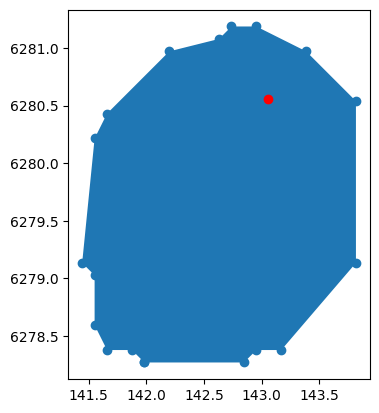

In [76]:
plt.scatter(xx,yy)
cell_segs.iloc[[within[0]]].plot(ax=plt.gca())
plt.scatter([x],[y],c='r')

In [32]:
cell_segs.iloc[cands]

geometry
026424000046  POLYGON ((131.831 6267.255, 131.183 6267.579, ...

In [27]:
cell_segs.sindex.intersection([x,y,x,y])

array([726])

In [19]:
from shapely import geometry
pt_gdf = gpd.GeoDataFrame([geometry.Point(x,y) for x,y in mr.transcripts.coords_micron[:,:2]])
within = gpd.sjoin(pt_gdf, cell_segs, how='left', op='within')

KeyboardInterrupt: 

In [ ]:
pt_gdf

In [ ]:
pt_gdf = gpd.GeoDataFrame([geometry.Point(x,y) for x,y in mr.transcripts.coords_micron[:,:2].values])
within = gpd.sjoin(pt_gdf, seg_gdf, how='left', op='within')

# within = partition_points(seg_gdf, 
#                           mr.detected_transcripts[['global_x','global_y']].values)

within = within.loc[within.index.drop_duplicates(keep=False)]
within = within.rename(columns={'index_right':'cell'})    
within['gene'] = mr.detected_transcripts.iloc[within.index]['gene'].values

cxg = within.dropna().groupby(['cell','gene'])['gene'].count().to_frame('num')
cxg = cxg.reset_index().pivot(index = 'cell', columns='gene', values='num')
cxg = cxg.reindex(seg_gdf.index).fillna(0).astype(int)
cxg.columns.name=None
cxg.index.name='cell'

def sort_cxg_cols(_cxg):
#         blank_cols = _cxg.columns.str.startswith('Blank-')
#         _cxg = _cxg[_cxg.columns[~blank_cols].tolist()+_cxg.columns[blank_cols].tolist()]
    return _cxg
cxg = sort_cxg_cols(cxg)


In [13]:
cxg = segor.partition_transcripts(cell_segs,mr)

AttributeError: 'MerfishRegion' object has no attribute 'detected_transcripts'

In [12]:
cell_segs

geometry
052777000031  POLYGON ((201.815 5056.586, 201.599 5056.802, ...
052777000032  POLYGON ((199.979 5059.394, 199.547 5059.610, ...
052777000034  POLYGON ((201.059 5062.958, 200.951 5063.066, ...
052777000038  POLYGON ((199.439 5066.630, 198.683 5067.170, ...
052777000041  POLYGON ((200.735 5069.546, 200.519 5069.762, ...
...                                                         ...
056121000012  POLYGON ((8970.918 2562.241, 8970.810 2562.349...
013907000442  POLYGON ((8968.218 2567.317, 8968.110 2567.533...
056121000038  MULTIPOLYGON (((8959.470 2572.177, 8959.578 25...
027558000391  POLYGON ((8716.903 2799.407, 8717.011 2799.947...
056121000511  POLYGON ((8736.991 2816.147, 8737.423 2815.823...

[352262 rows x 1 columns]

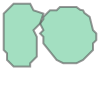

In [11]:
cell_segs.loc['056121000038'].values[0]

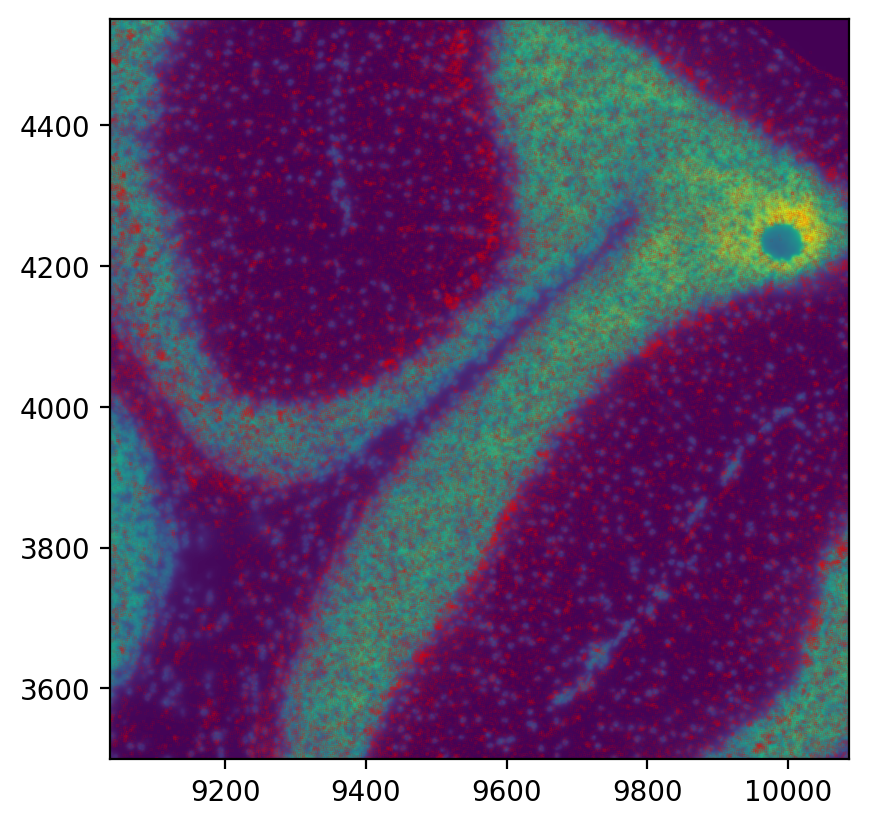

In [72]:
plt.figure(dpi=200)
# bbox = mr.tiles.tiles[811]
bbox = mf.BBox([84048, 32788, 10456, 10456])
mf.pl.imgplot_bbox(plt.gca(),bbox,mr,'DAPI',3)
xlim = plt.xlim()
ylim = plt.ylim()
# plt.show()
# bbox = mf.BBox([84048+100, 32788+100, 10456, 10456])
# plt.figure(dpi=200)
tmp = mr.transcripts.get_transcripts(bbox).sample(frac=0.1)
plt.scatter(tmp['global_x']-70,tmp['global_y']+22, s=0.001, c='r', marker='.')
plt.gca().set_aspect('equal')
# plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.show()


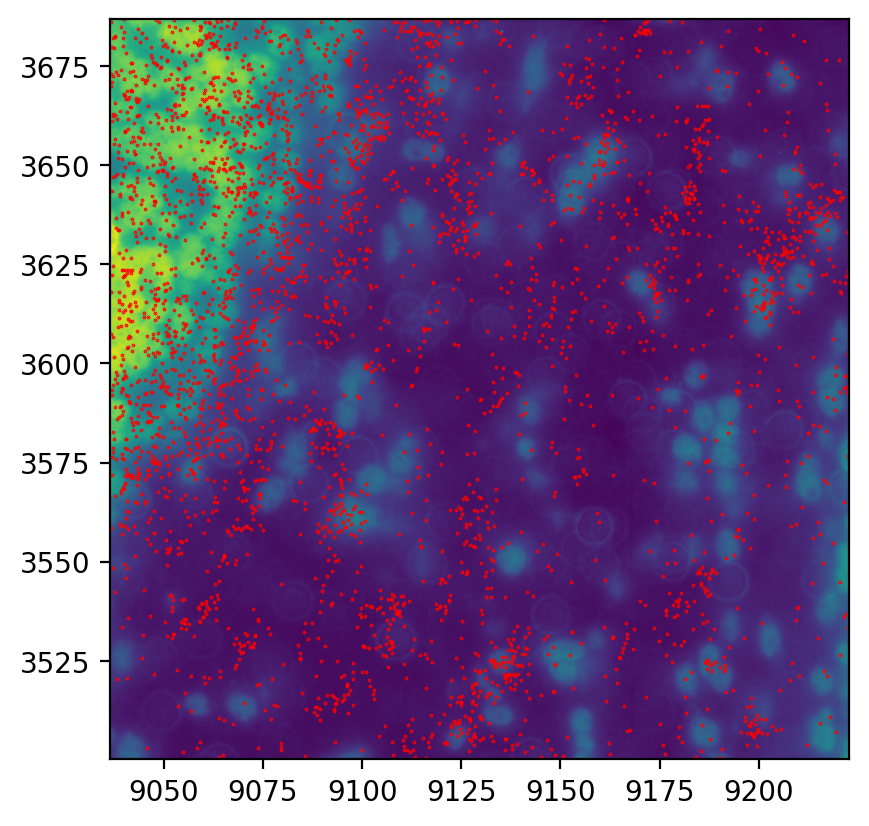

In [51]:
plt.figure(dpi=200)
# bbox = mr.tiles.tiles[811]
bbox = mf.BBox([84048, 32788, 2456, 2456])
mf.pl.imgplot_bbox(plt.gca(),bbox,mr,'PolyT',3)
bbox = mf.BBox([84048+1, 32788+1, 2456, 2456])
tmp = mr.transcripts.get_transcripts(bbox).sample(frac=0.1)
plt.scatter(tmp['global_x'],tmp['global_y'], s=0.5, c='r', marker='.')


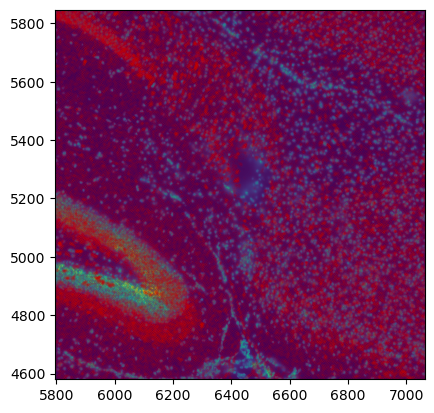

In [22]:
bbox = mr.tiles.tiles[811]
bbox = mf.BBox([54048, 42788, 12456, 12456])
mf.pl.imgplot_bbox(plt.gca(),bbox,mr,'DAPI',3)
tmp = mr.transcripts.get_transcripts(bbox).sample(frac=0.1)
plt.scatter(tmp['global_x'],tmp['global_y'], s=0.001, c='r', marker='.')


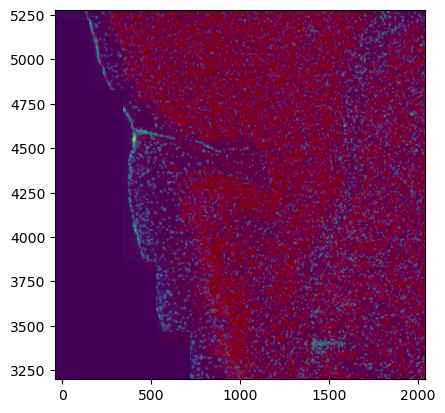

In [6]:
mf.pl.imgplot_bbox(plt.gca(),mf.BBox([0,30000,20000,20000]),mr,'DAPI',3)
tmp = mr.transcripts.get_transcripts(mf.BBox([0,30000,20000,20000])).sample(frac=0.1)
plt.scatter(tmp['global_x'],tmp['global_y'], s=0.0001, c='r', marker='.')

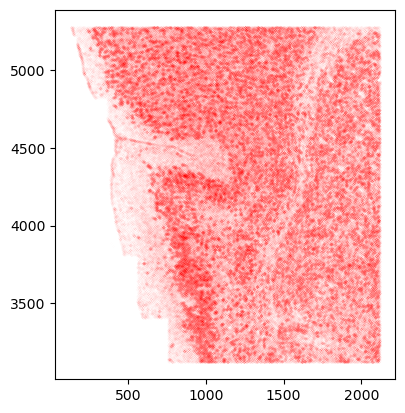

In [25]:
tmp = mr.transcripts.get_transcripts(mf.BBox([0,30000,20000,20000])).sample(frac=0.1)
plt.scatter(tmp['global_x'],tmp['global_y'], s=0.0001, c='r', marker='.')
plt.gca().set_aspect('equal')

In [10]:
mr.transcripts.coords_micron.min(0),mr.transcripts.coords_micron.max(0)

(array([ -23.907341, -108.149345,    0.      ], dtype=float32),
 array([1.1225501e+04, 7.8073647e+03, 6.0000000e+00], dtype=float32))

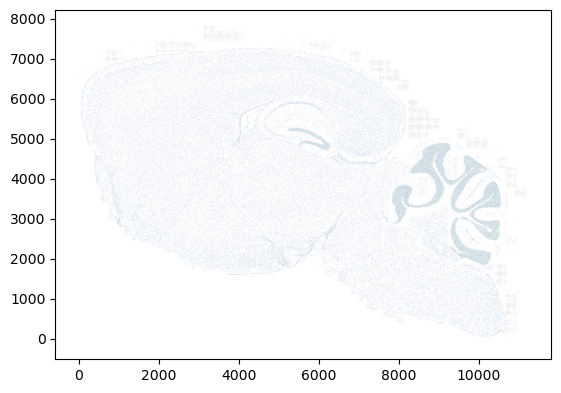

In [15]:
cell_segs['geometry'].plot(ax=plt.gca())
plt.gca().set_aspect('equal')

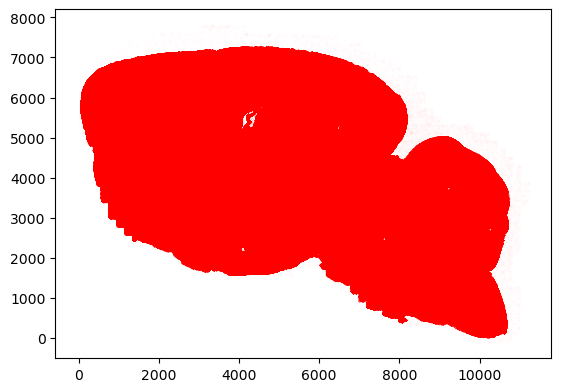

In [73]:
plt.scatter(mr.transcripts.coords_micron[:,0],mr.transcripts.coords_micron[:,1], s=0.0001, c='r', marker='.')
plt.gca().set_aspect('equal')

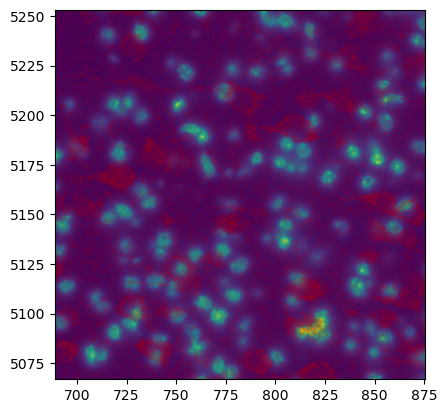

In [8]:
mf.pl.imgplot(plt.gca(), mr, 'DAPI', 3, 120)
tmp = mr.transcripts.get_transcripts(mr.tiles.tiles[120])
plt.scatter(tmp['global_x'],tmp['global_y'], s=0.001, c='r', marker='.')

In [7]:
tmp['global_x'].min()

688.9992065429688

In [15]:
mr.unit_transform.mosaic_to_micron([[6756, 9212], [47292, 49748]])

array([[ 688.99895469,  875.2971925 ],
       [5066.85450622, 5253.1441769 ]])

In [14]:
mr.tiles.tiles[120],mr.tiles.tiles[120].bounds

((6756, 47292, 2456, 2456), (6756, 47292, 9212, 49748))

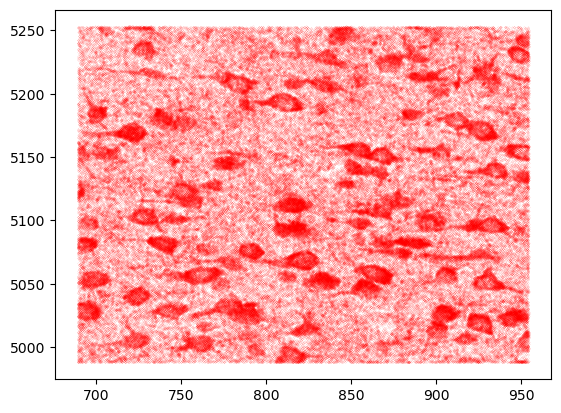

In [10]:
mr.transcripts.genes

array([['Pfkl'],
       ['Stmn2'],
       ['Ppp2r2c'],
       ...,
       ['Arpp21'],
       ['Rgs7'],
       ['Mdh1']], dtype=object)

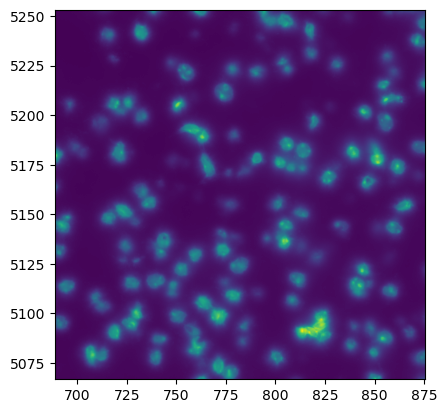

In [22]:
plt.imshow(mr.read_tile('DAPI',3,120), origin='lower', extent=[xmin_,xmax_,ymin_,ymax_])

In [17]:
tmp = np.random.randint(0,10,size=(7,15))
tmp

array([[2, 3, 3, 7, 1, 6, 7, 1, 4, 1, 0, 8, 5, 4, 0],
       [3, 1, 9, 3, 9, 3, 6, 3, 3, 1, 3, 9, 2, 3, 8],
       [8, 6, 0, 1, 2, 1, 3, 5, 4, 4, 6, 0, 7, 3, 1],
       [1, 2, 7, 7, 8, 0, 5, 3, 5, 0, 3, 9, 6, 7, 3],
       [8, 1, 2, 7, 7, 5, 5, 6, 0, 2, 2, 8, 4, 0, 7],
       [7, 0, 8, 6, 0, 9, 2, 3, 2, 1, 9, 7, 9, 0, 2],
       [0, 9, 2, 8, 8, 6, 5, 0, 0, 2, 0, 3, 6, 4, 8]])

((3.7, 33.7), (10.5, 24.5))

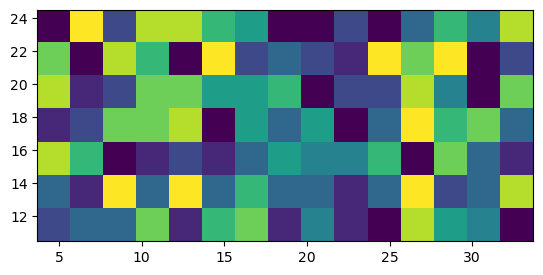

In [20]:
plt.imshow(tmp, origin='lower',extent=[3.7, 33.7,10.5,24.5, ], aspect='equal')
plt.xlim(),plt.ylim()

((-0.5, 14.5), (-0.5, 6.5))

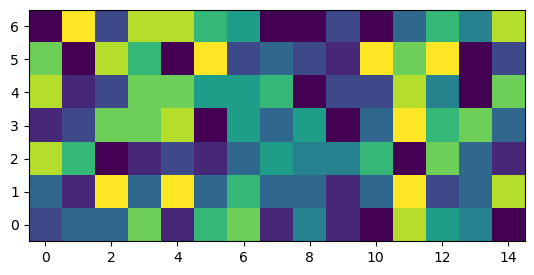

In [21]:
plt.imshow(tmp, origin='lower',aspect='equal')
plt.xlim(),plt.ylim()

In [14]:
dir(mr.transcripts)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'coords_micron',
 'genes',
 'get_transcripts_micron',
 'get_transcripts_mosaic']

In [13]:
mr.transcripts.coords_micron
# pd.read_csv(self.region_dir/'detected_transcripts.csv', index_col=0)

array([[  136.95071 ,  6535.638   ,     0.      ],
       [  158.81393 ,  6467.5117  ,     0.      ],
       [  -16.313011,  6529.917   ,     0.      ],
       ...,
       [11038.158   ,  3857.4949  ,     0.      ],
       [11116.6455  ,  3890.4536  ,     0.      ],
       [11208.985   ,  3862.0928  ,     0.      ]])

In [11]:
cxg = segor.partition_transcripts(cell_segs, mr)

AttributeError: 'MerfishRegion' object has no attribute 'detected_transcripts'

/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


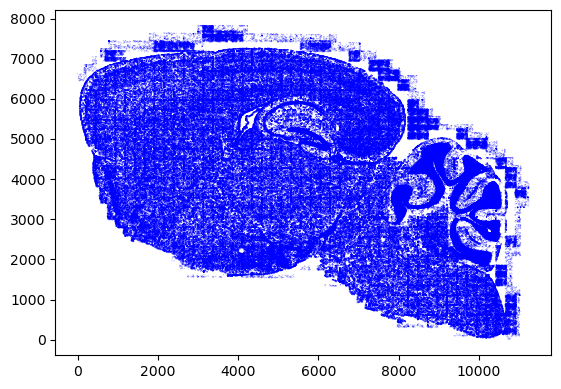

In [10]:
mf.pl.geoplot_bbox(plt.gca(),mf.BBox([0,0,11300,7900]),cell_segs,
#                    style=geo_styles
                  )

In [ ]:
cell_segs = seg_micron
del seg_micron

/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


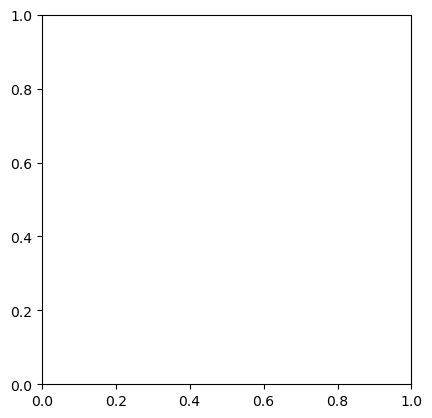

In [6]:
tile_i = 818

mf.pl.imgplot(plt.gca(), mr, 'DAPI',3, tile_i, cmap='Purples')
geo_styles = {
        'Point': {'color': 'r', 'marker':'.', 'markersize': 1},
        'Polygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
        'MultiPolygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
    }
mf.pl.geoplot_bbox(plt.gca(),mr.tiles.tiles[tile_i],segs[tile_i],style=geo_styles)

/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


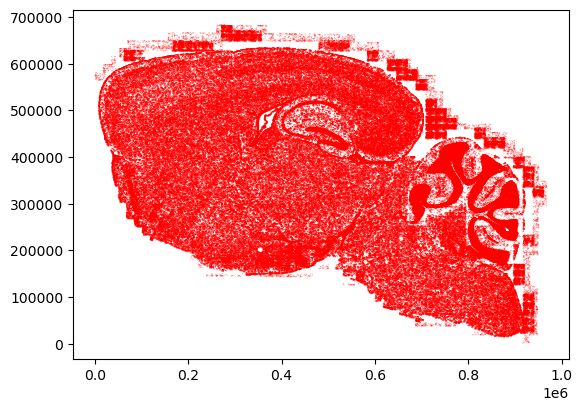

In [12]:
geo_styles = {
        'Point': {'color': 'r', 'marker':'.', 'markersize': 1},
        'Polygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
        'MultiPolygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
    }
mf.pl.geoplot_bbox(plt.gca(),mf.BBox([0,0,967439.05609322, 681956.29177094]),seg_micron,style=geo_styles)
# mf.pl.geoplot_bbox(plt.gca(),mf.BBox([0,0,mr.region_width,mr.region_height]),seg_micron,style=geo_styles)


In [9]:
seg_mosaic

geometry
063924000031  POLYGON ((2245.000 47928.000, 2243.000 47930.0...
063924000032  POLYGON ((2228.000 47954.000, 2224.000 47956.0...
063924000034  POLYGON ((2238.000 47987.000, 2237.000 47988.0...
063924000038  POLYGON ((2223.000 48021.000, 2216.000 48026.0...
063924000041  POLYGON ((2235.000 48048.000, 2233.000 48050.0...
...                                                         ...
001851000012  POLYGON ((83439.000 24837.000, 83439.500 24838...
062491000442  POLYGON ((83416.000 24879.000, 83415.000 24881...
001851000038  MULTIPOLYGON (((83335.000 24924.000, 83336.000...
036769000391  POLYGON ((81091.000 27025.000, 81089.000 27028...
001851000511  POLYGON ((81275.000 27183.000, 81279.000 27180...

[352262 rows x 1 columns]

In [ ]:
seg_mosaic = seg
# seg_micron
del seg

In [42]:
import glob
segs = [ gpd.read_parquet('/gale/netapp/home/wtian/bican/incoming/output/'
                             '202310201411_P28-mouse-brain-B4-1_VMSC12802/region_0/MOREFISH/ReSeg/'
                             f'test/tiles/tile_{i}.parquet') for i in range(
    1020
#     len(mr.tiles.tiles)
)]


In [43]:
step = 20
n_cpus = 1

import multiprocessing
if n_cpus>1:
    pool = multiprocessing.Pool(n_cpus)
    
try:
    while len(segs) > 1:
        segs = [segs[i:i+step] for i in range(0, len(segs), step)]
        if n_cpus > 1:
            segs = pool.map(segor.compile_segs, segs)
        else:
            segs = [segor.compile_segs(x) for x in segs]

except Exception as e:
    print("Error occurred:", e)

finally:
    if n_cpus > 1:
        pool.close()
        pool.join()
    
ha, = segs

/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


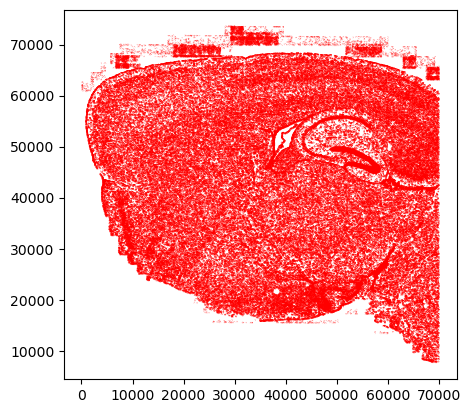

In [41]:
geo_styles = {
        'Point': {'color': 'r', 'marker':'.', 'markersize': 1},
        'Polygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
        'MultiPolygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
    }
mf.pl.geoplot_bbox(plt.gca(),mf.BBox([0,0,mr.region_width,mr.region_height]),ha,style=geo_styles)

In [15]:
step = 20
segtree_new1 = []
for i in range(0, len(segtree), step):
    segtree_new1.append( segor.compile_segs(segtree[i:i+step]) )


In [16]:
segtree_chunks = [segtree[i:i+step] for i in range(0, len(segtree), step)]

with multiprocessing.Pool(20) as pool:
    segtree_new2 = pool.map(segor.compile_segs, segtree_chunks)

In [17]:
len(segtree_new1),len(segtree_new2)

(40, 40)

In [19]:
ha = segor.compile_segs(segtree_new1)

/data/wtian/local/miniconda3/envs/morefish/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


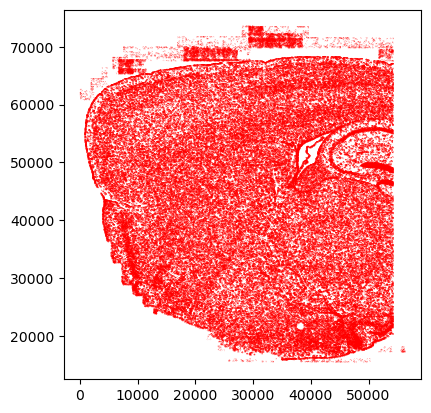

In [28]:
geo_styles = {
        'Point': {'color': 'r', 'marker':'.', 'markersize': 1},
        'Polygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
        'MultiPolygon': {'facecolor': 'none', 'edgecolor': 'r', 'linewidth': 1},
    }
mf.pl.geoplot_bbox(plt.gca(),mf.BBox(ha['geometry'].total_bounds.astype(int).tolist()),ha,style=geo_styles)